# Kevin Ryan, JHU Spring '23
# Unleashing Open Data with Python
# Final Project - Attacks on Healthcare Workers and Infrstructure in Ukraine

In [ ]:
import pandas as pd

# read the Excel file into a pandas dataframe
df = pd.read_excel("2022-2023-ukraine-attacks-on-health-care-incident-data.xlsx")

# display the first 5 rows of the dataframe to verify it was read in correctly
print(df.head())

### Translate Event Descriptions from Ukrainian to English

In [ ]:
from googletrans import Translator

# Create a translator object
translator = Translator()

# Define a function to translate from Ukrainian to English
def translate_text(text):
    return translator.translate(text, src='uk', dest='en').text

# Apply the function adn make a new column
df['eventDescriptionEnglishLang'] = df['eventDescriptionUkranianLang'].apply(translate_text)

# Save the translated dataframe to a new CSV file
df.to_csv("translated_data.csv", index=False)

### Read in the CSV and Setup

In [87]:
import matplotlib.pyplot as plt

df = pd.read_csv("translated_data1.csv")

### Force Numeric and Date columns to read properly

In [88]:
# Convert the selected columns to numeric

numeric_cols = ['categoryHealthFacilitiesDamagedDestroyed', 'Infrastructure: Hospital',
                'Infrastructure: Health Transport', 'Infrastructure: Other',
                'HealthWorkersAttack: Health Building', 'HealthWorkersAttack: No Information',
                'HealthWorkersAttack: Everyday Activities', 'HealthWorkersAttack: Outside Health Facility']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

numeric_cols = ['Number of Attacks on Health Facilities Reporting Destruction',
                'Number of Attacks on Health Facilities Reporting Damaged',
                'Health Workers Killed', 'Health Workers Kidnapped',
                'Health Workers Arrested', 'Health Workers Injured',
                'Health Workers Assaulted']

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

In [89]:
# Convert ISODate to date format, drop bad columns (Ukrainian text explanation instead of date)

df = df.apply(lambda col: pd.to_datetime(col, errors='coerce') if col.name == 'ISODate' else col)

df = df.dropna(subset=['ISODate'])

# Reset the index 
df = df.reset_index(drop=True)

In [90]:
# Describe df

df.describe()


,eventSindID,categoryHealthFacilitiesDamagedDestroyed,Infrastructure: Hospital,Infrastructure: Health Transport,Infrastructure: Other,HealthWorkersAttack: Health Building,HealthWorkersAttack: No Information,HealthWorkersAttack: Everyday Activities,HealthWorkersAttack: Outside Health Facility,Number of Attacks on Health Facilities Reporting Destruction,Number of Attacks on Health Facilities Reporting Damaged,Health Workers Killed,Health Workers Kidnapped,Health Workers Arrested,Health Workers Injured,Health Workers Assaulted
count,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000,785.000000
mean,34662.561783,0.407643,0.365605,0.054777,0.243312,0.043312,0.008917,0.015287,0.035669,0.078981,0.365605,0.105732,0.078981,0.031847,0.086624,0.003822
std,1691.583912,0.491710,0.481906,0.227690,0.429356,0.203689,0.094069,0.122769,0.185581,0.317643,0.539358,0.599983,1.519055,0.721573,0.473951,0.107075
min,30995.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33364.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,34717.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,36069.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,37668.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,12.000000,42.000000,20.000000,7.000000,3.000000


### Plot types of attack on workers over time

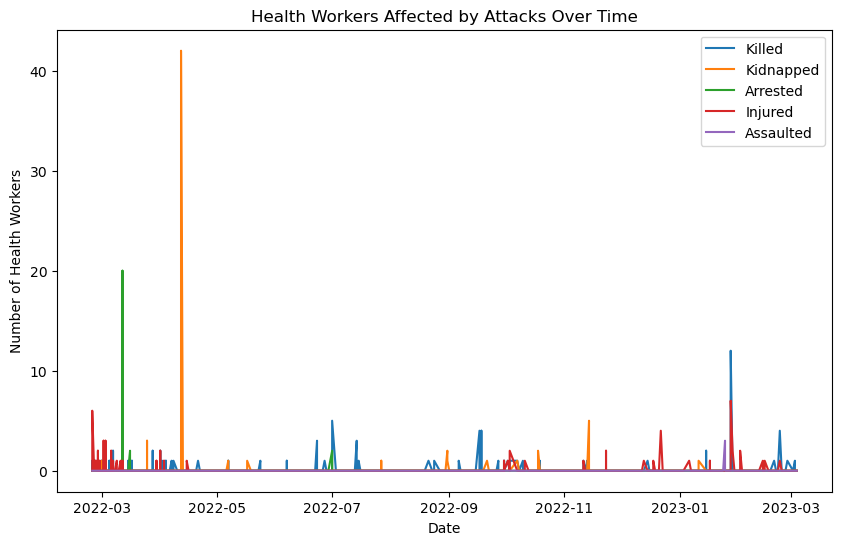

In [20]:
# Plot line graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['ISODate'], df['Health Workers Killed'], label='Killed')
ax.plot(df['ISODate'], df['Health Workers Kidnapped'], label='Kidnapped')
ax.plot(df['ISODate'], df['Health Workers Arrested'], label='Arrested')
ax.plot(df['ISODate'], df['Health Workers Injured'], label='Injured')
ax.plot(df['ISODate'], df['Health Workers Assaulted'], label='Assaulted')

# Fix graph
ax.set_xlabel('Date')
ax.set_ylabel('Number of Health Workers')
ax.set_title('Health Workers Affected by Attacks Over Time')
ax.legend()

plt.show()

### Plot infrastructure facilities affected by attacks over time

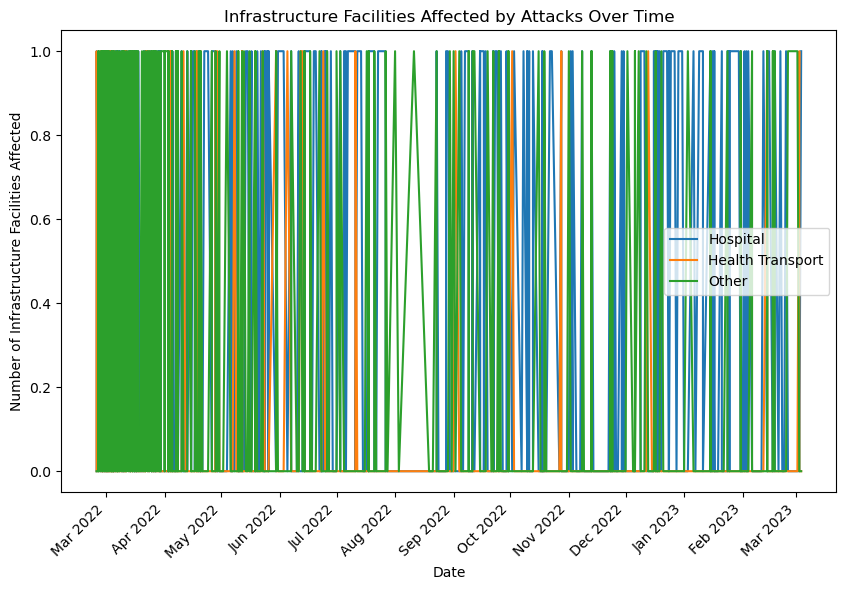

In [21]:
from matplotlib.dates import MonthLocator, DateFormatter

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['ISODate'], df['Infrastructure: Hospital'], label='Hospital')
ax.plot(df['ISODate'], df['Infrastructure: Health Transport'], label='Health Transport')
ax.plot(df['ISODate'], df['Infrastructure: Other'], label='Other')

# Label graph
ax.set_xlabel('Date')
ax.set_ylabel('Number of Infrastructure Facilities Affected')
ax.set_title('Infrastructure Facilities Affected by Attacks Over Time')
ax.legend()

# Format x-axis to display only the months so it isn't crowded
months = MonthLocator()
date_format = DateFormatter('%b %Y')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45, ha='right')

plt.show()

#LOL

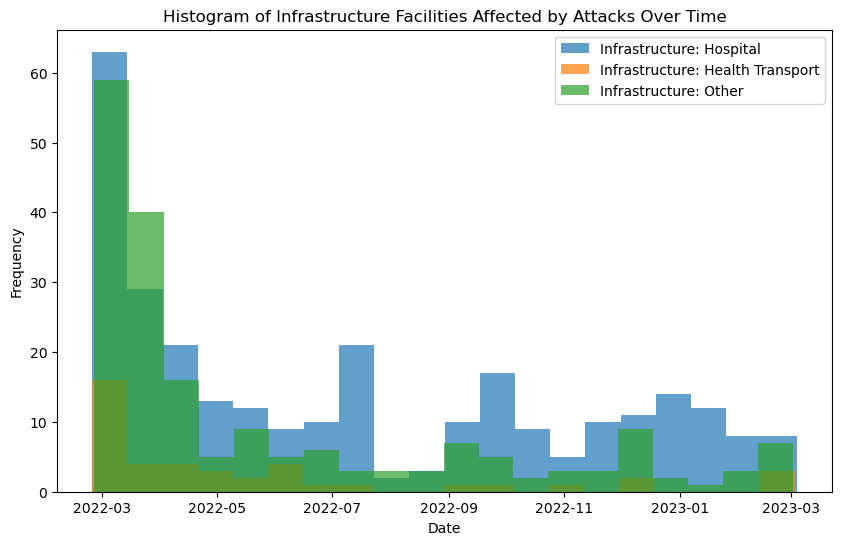

In [23]:
# Define bins for the histogram
bins = 20

# Create histogram for each facility type
fig, ax = plt.subplots(figsize=(10, 6))
for facility in ['Infrastructure: Hospital', 'Infrastructure: Health Transport', 'Infrastructure: Other']:
    ax.hist(df[df[facility] > 0]['ISODate'], bins=bins, alpha=0.7, label=facility)

# Label graph
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Infrastructure Facilities Affected by Attacks Over Time')
ax.legend()

plt.show()



### Plot attacks on a Map

In [94]:
import folium

# Read in the data and drop any rows with missing latitude or longitude data
df = df.dropna(subset=['latitude2', 'longitude2'])

# Create a map and center it
m = folium.Map(location=[df['latitude2'].median(), df['longitude2'].median()], zoom_start=5)

# Loop 
for col in ['Health Workers Killed', 'Health Workers Kidnapped', 'Health Workers Arrested', 'Health Workers Injured', 'Health Workers Assaulted']:
    df_filtered = df[df[col] > 0]
    for i, row in df_filtered.iterrows():
        popup_text = f"{row['eventDescription']} ({col}: {row[col]})"
        folium.Marker([row['latitude2'], row['longitude2']], popup=popup_text).add_to(m)

# Show the map
m


### Plot Pie Charts for Perpetrators of attack, Weapons used to attack 

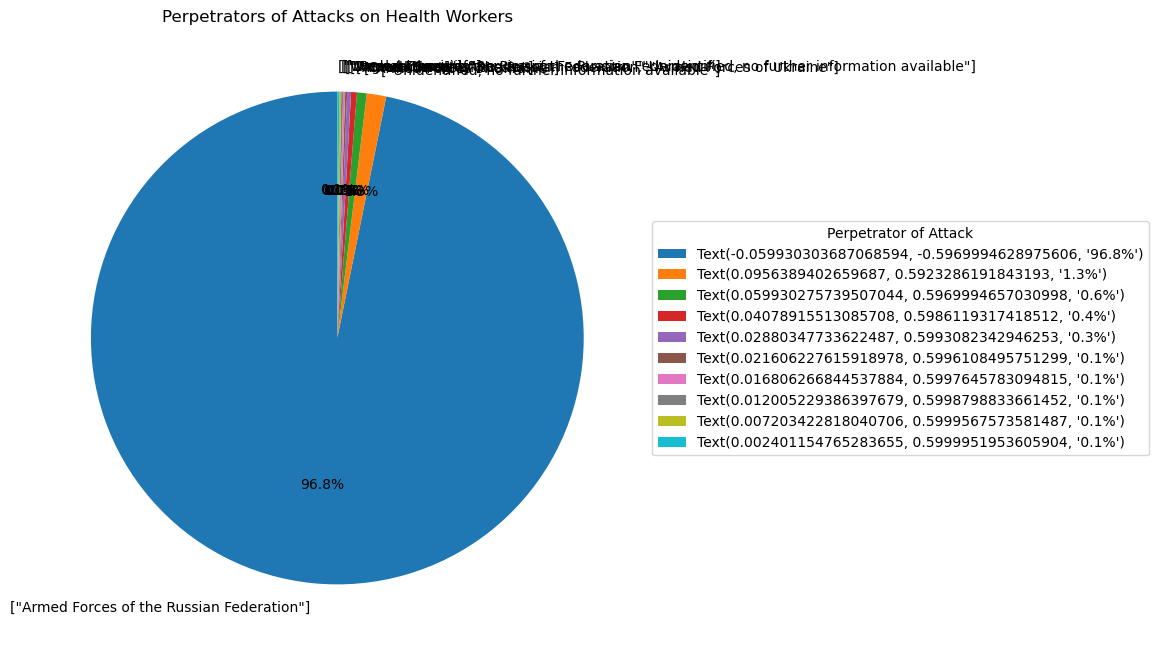

In [37]:
### FIX
# Get the counts of each type of perpetrator
counts = df['Perpetrator of Attack'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _, labels = ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)

# title
ax.set_title("Perpetrators of Attacks on Health Workers")

# legend
ax.legend(wedges, labels, title="Perpetrator of Attack", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()

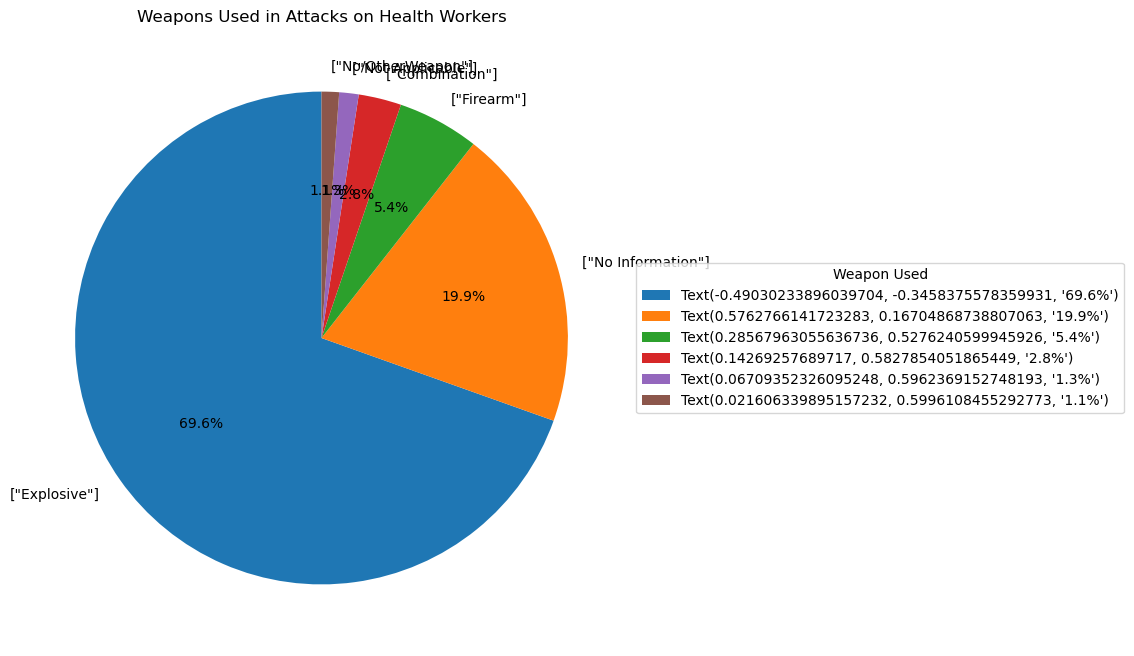

In [38]:
### Fix
# Get the counts of each type of weapon used
counts = df['Weapon Used'].value_counts()

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _, labels = ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90, labeldistance=1.1)

# title
ax.set_title("Weapons Used in Attacks on Health Workers")

# legend
ax.legend(wedges, labels, title="Weapon Used", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()


In [49]:
# Read in Russian Personnel losses
df1 = pd.read_csv("Russia_losses_personnel.csv")

# Drop the non-useful column
df1 = df1.drop(columns=["personnel*"])

# Fix that it is a cumulative total
df1["daily_increase"] = df1["personnel"].diff()

# Force the date to be an ISODate
df1["date"] = pd.to_datetime(df1["date"])

print(df1)

# Summary statistics for df
print('Summary statistics for df:')
print(df.describe())

# Summary statistics for df1
print('\nSummary statistics for df1:')
print(df1.describe())

          date  day  personnel    POW  daily_increase
0   2022-02-25    2       2800    0.0             NaN
1   2022-02-26    3       4300    0.0          1500.0
2   2022-02-27    4       4500    0.0           200.0
3   2022-02-28    5       5300    0.0           800.0
4   2022-03-01    6       5710  200.0           410.0
..         ...  ...        ...    ...             ...
390 2023-03-22  392     167490    NaN           920.0
391 2023-03-23  393     168150    NaN           660.0
392 2023-03-24  394     169170    NaN          1020.0
393 2023-03-25  395     169890    NaN           720.0
394 2023-03-26  396     170550    NaN           660.0

[395 rows x 5 columns]
Summary statistics for df:
        eventSindID  categoryHealthFacilitiesDamagedDestroyed  \
count    785.000000                                785.000000   
mean   34662.561783                                  0.407643   
std     1691.583912                                  0.491710   
min    30995.000000                      

In [44]:
# Create a new column for total workers effected
df['Total workers effected'] = df['Health Workers Killed'] + df['Health Workers Kidnapped'] + df['Health Workers Arrested'] + df['Health Workers Injured'] + df['Health Workers Assaulted']

# Create a new column for total infrastructure effected
df['Total infrastructure effected'] = df[['Infrastructure: Hospital', 'Infrastructure: Health Transport', 'Infrastructure: Other']].sum(axis=1)

# Merge the daily increase column from df1 into df based on the date column
df = pd.merge(df, df1[['date', 'daily_increase']], how='left', left_on='ISODate', right_on='date')

# Calculate the correlation between daily increase in personnel losses and total workers/infrastructure effected
corr_workers = df['daily_increase'].corr(df['Total workers effected'])
corr_infra = df['daily_increase'].corr(df['Total infrastructure effected'])

print(f"Correlation between daily increase and total workers effected: {corr_workers}")
print(f"Correlation between daily increase and total infrastructure effected: {corr_infra}")


Correlation between daily increase and total workers effected: -0.007055612123944261
Correlation between daily increase and total infrastructure effected: -0.04895629684547883


### A weak, negative correlation exists between Russian invaders killed in action (KIA) and Attacks on Healthcare workers (-0.007055612123944261) and Attacks on Healthcare Infrastructure (-0.04895629684547883). 


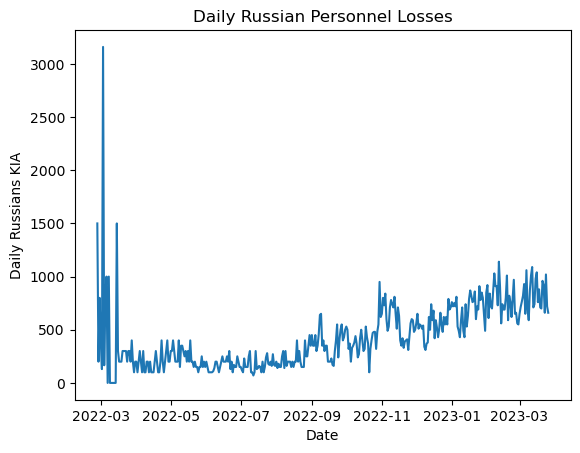

In [51]:
# Plot daily_increase over date
plt.plot(df1['date'], df1['daily_increase'])
plt.xlabel('Date')
plt.ylabel('Daily Russians KIA')
plt.title('Daily Russian Personnel Losses')
plt.show()


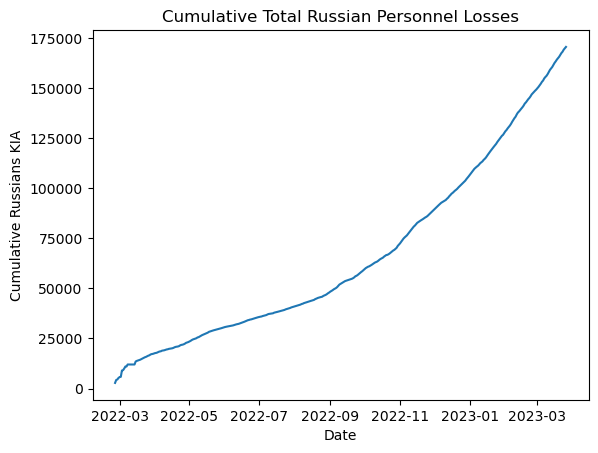

In [53]:

# Plot cumulative increase over date
plt.plot(df1['date'], df1['personnel'])
plt.xlabel('Date')
plt.ylabel('Cumulative Russians KIA')
plt.title('Cumulative Total Russian Personnel Losses')
plt.show()

In [101]:
import pandas as pd

df2 = pd.read_csv('russia_losses_equipment.csv')

In [102]:
# Select the relevant columns
cumulative_columns = ['aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship', 'anti-aircraft warfare', 'special equipment', 'mobile SRBM system']

# Compute the daily increase for each column to fix cumulative
for col in cumulative_columns:
    df2[f'{col}_daily_increase'] = df2[col].diff()

print(df2)

           date  day  aircraft  helicopter  tank   APC  field artillery  MRL  \
0    2022-02-25    2        10           7    80   516               49    4   
1    2022-02-26    3        27          26   146   706               49    4   
2    2022-02-27    4        27          26   150   706               50    4   
3    2022-02-28    5        29          29   150   816               74   21   
4    2022-03-01    6        29          29   198   846               77   24   
..          ...  ...       ...         ...   ...   ...              ...  ...   
390  2023-03-22  392       305         290  3557  6887             2589  509   
391  2023-03-23  393       305         290  3570  6898             2608  511   
392  2023-03-24  394       305         290  3574  6921             2616  511   
393  2023-03-25  395       305         291  3580  6932             2623  520   
394  2023-03-26  396       305         291  3595  6947             2631  522   

     military auto  fuel tank  ...  APC

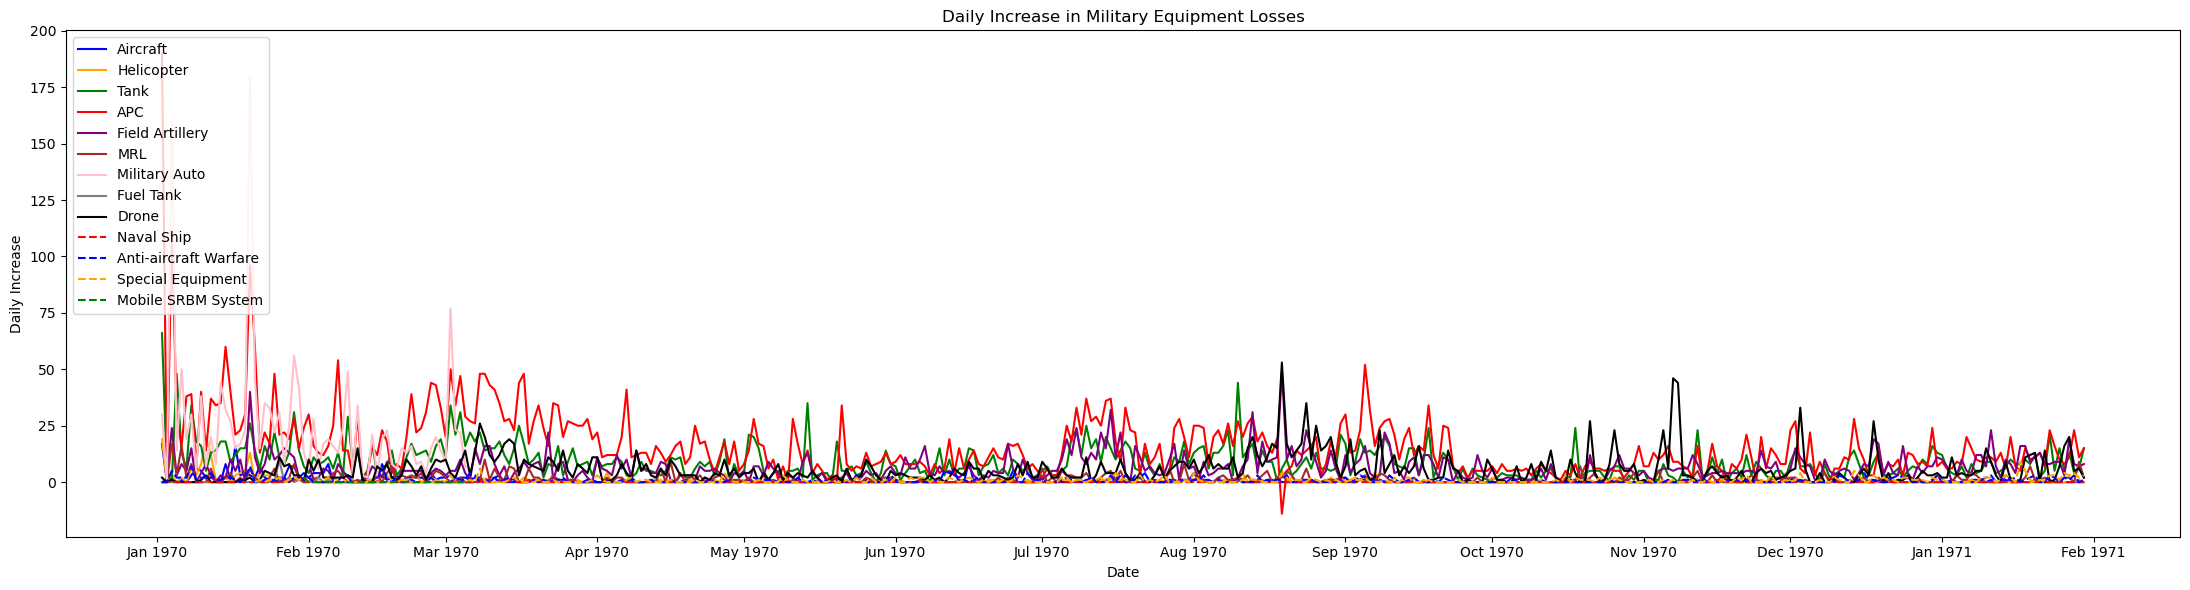

In [62]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(22,6))

plt.plot(df2['date'], df2['aircraft_daily_increase'], color='blue', label='Aircraft')
plt.plot(df2['date'], df2['helicopter_daily_increase'], color='orange', label='Helicopter')
plt.plot(df2['date'], df2['tank_daily_increase'], color='green', label='Tank')
plt.plot(df2['date'], df2['APC_daily_increase'], color='red', label='APC')
plt.plot(df2['date'], df2['field artillery_daily_increase'], color='purple', label='Field Artillery')
plt.plot(df2['date'], df2['MRL_daily_increase'], color='brown', label='MRL')
plt.plot(df2['date'], df2['military auto_daily_increase'], color='pink', label='Military Auto')
plt.plot(df2['date'], df2['fuel tank_daily_increase'], color='gray', label='Fuel Tank')
plt.plot(df2['date'], df2['drone_daily_increase'], color='black', label='Drone')
plt.plot(df2['date'], df2['naval ship_daily_increase'], color='red', linestyle='dashed', label='Naval Ship')
plt.plot(df2['date'], df2['anti-aircraft warfare_daily_increase'], color='blue', linestyle='dashed', label='Anti-aircraft Warfare')
plt.plot(df2['date'], df2['special equipment_daily_increase'], color='orange', linestyle='dashed', label='Special Equipment')
plt.plot(df2['date'], df2['mobile SRBM system_daily_increase'], color='green', linestyle='dashed', label='Mobile SRBM System')

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Daily Increase')
plt.title('Daily Increase in Military Equipment Losses')

# Format x-axis labels to show only the month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()


In [68]:
# Convert 'date' column in df2 
df2['date'] = pd.to_datetime(df2['date'])

# Merge the three dataframes on 'date' column
df3 = pd.merge(df, df1, on='date')
df3 = pd.merge(df3, df2, on='date')

# Set the index to 'date'
df3.set_index('date', inplace=True)


In [75]:
print(df3.shape)
print(df3.head)

(782, 65)
<bound method NDFrame.head of             eventSindID                                   eventDescription  \
date                                                                         
2022-02-25        31465  25 February 2022: The vicinity of a children’s...   
2022-02-25        33976  25 February 2022: A centre for emergency medic...   
2022-02-25        34134  25 February 2022: A hospital was destroyed by ...   
2022-02-25        31842  25 February 2022: The city’s utilities were cu...   
2022-02-25        31411  25 February 2022: A psychiatric hospital was r...   
...                 ...                                                ...   
2023-03-02        37542  02 March 2023: A health facility was destroyed...   
2023-03-03        37514  03 March 2023: A paramedic was killed when the...   
2023-03-03        37543  As reported on, 03 March 2023: An ambulance wa...   
2023-03-03        37511  03 March 2023: A hospital was reported to have...   
2023-03-04        37554 

In [77]:
# Add a column to df3 called "Total_Attacks_Workers" that is the sum of the daily totals of the columns you specified
df3['Total_Attacks_Workers'] = df[['Health Workers Killed', 'Health Workers Kidnapped', 'Health Workers Arrested', 'Health Workers Injured', 'Health Workers Assaulted']].sum(axis=1)


In [86]:
import numpy as np
import statsmodels.api as sm

df3 = df3.dropna()  # drop rows with NaN values

X = sm.add_constant(df3['personnel'])  # add a constant term
y = df3['total_attacks_workers']

model = sm.OLS(y, X).fit()  # fit the OLS model

print(model.summary())  # print the model summary



KeyError: 'total_attacks_workers'

In [91]:

df1.describe()


,day,personnel,POW,daily_increase
count,395.000000,395.000000,62.000000,394.000000
mean,199.000000,66318.787342,386.387097,425.761421
std,114.170924,44805.050966,131.440363,305.628221
min,2.000000,2800.000000,0.000000,0.000000
25%,100.500000,31000.000000,389.000000,200.000000
50%,199.000000,52250.000000,421.000000,350.000000
75%,297.500000,97985.000000,474.500000,620.000000
max,396.000000,170550.000000,496.000000,3160.000000


In [92]:

df2.describe()


,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,...,APC_daily_increase,field artillery_daily_increase,MRL_daily_increase,military auto_daily_increase,fuel tank_daily_increase,drone_daily_increase,naval ship_daily_increase,anti-aircraft warfare_daily_increase,special equipment_daily_increase,mobile SRBM system_daily_increase
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,65.000000,65.000000,395.000000,...,394.000000,394.000000,394.000000,64.000000,64.000000,394.000000,394.000000,394.000000,375.000000,35.000000
mean,199.000000,232.921519,211.967089,2098.126582,4457.972152,1294.458228,301.726582,1047.507692,69.323077,1045.091139,...,16.322335,6.553299,1.314721,25.015625,0.250000,5.624365,0.040609,0.703046,0.725333,0.057143
std,114.170924,64.794571,61.818396,967.923865,1705.429199,743.553903,131.007173,466.162060,7.545917,682.146583,...,15.732664,5.897638,2.151380,30.213784,1.297127,6.697842,0.221895,1.185425,1.128992,0.338062
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,...,-14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,100.500000,210.000000,175.000000,1371.500000,3372.500000,677.500000,207.000000,600.000000,60.000000,537.500000,...,7.000000,3.000000,0.000000,8.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,199.000000,239.000000,212.000000,2136.000000,4584.000000,1259.000000,311.000000,1178.000000,73.000000,898.000000,...,12.000000,5.000000,0.000000,18.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,297.500000,281.000000,264.000000,2986.000000,5960.500000,1947.500000,410.000000,1437.000000,76.000000,1648.500000,...,22.000000,9.000000,2.000000,30.000000,0.000000,8.000000,0.000000,1.000000,1.000000,0.000000
max,396.000000,305.000000,291.000000,3595.000000,6947.000000,2631.000000,522.000000,1701.000000,76.000000,2216.000000,...,190.000000,49.000000,17.000000,179.000000,10.000000,53.000000,2.000000,8.000000,9.000000,2.000000


In [93]:
df2.iloc[:, :15].describe()


,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,65.000000,65.000000,395.000000,395.000000,395.000000,376.000000,36.000000
mean,199.000000,232.921519,211.967089,2098.126582,4457.972152,1294.458228,301.726582,1047.507692,69.323077,1045.091139,13.840506,151.805063,121.255319,3.944444
std,114.170924,64.794571,61.818396,967.923865,1705.429199,743.553903,131.007173,466.162060,7.545917,682.146583,4.208691,69.647736,70.660833,0.333333
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000
25%,100.500000,210.000000,175.000000,1371.500000,3372.500000,677.500000,207.000000,600.000000,60.000000,537.500000,13.000000,95.000000,55.000000,4.000000
50%,199.000000,239.000000,212.000000,2136.000000,4584.000000,1259.000000,311.000000,1178.000000,73.000000,898.000000,15.000000,162.000000,125.000000,4.000000
75%,297.500000,281.000000,264.000000,2986.000000,5960.500000,1947.500000,410.000000,1437.000000,76.000000,1648.500000,16.000000,211.000000,178.000000,4.000000
max,396.000000,305.000000,291.000000,3595.000000,6947.000000,2631.000000,522.000000,1701.000000,76.000000,2216.000000,18.000000,277.000000,282.000000,4.000000


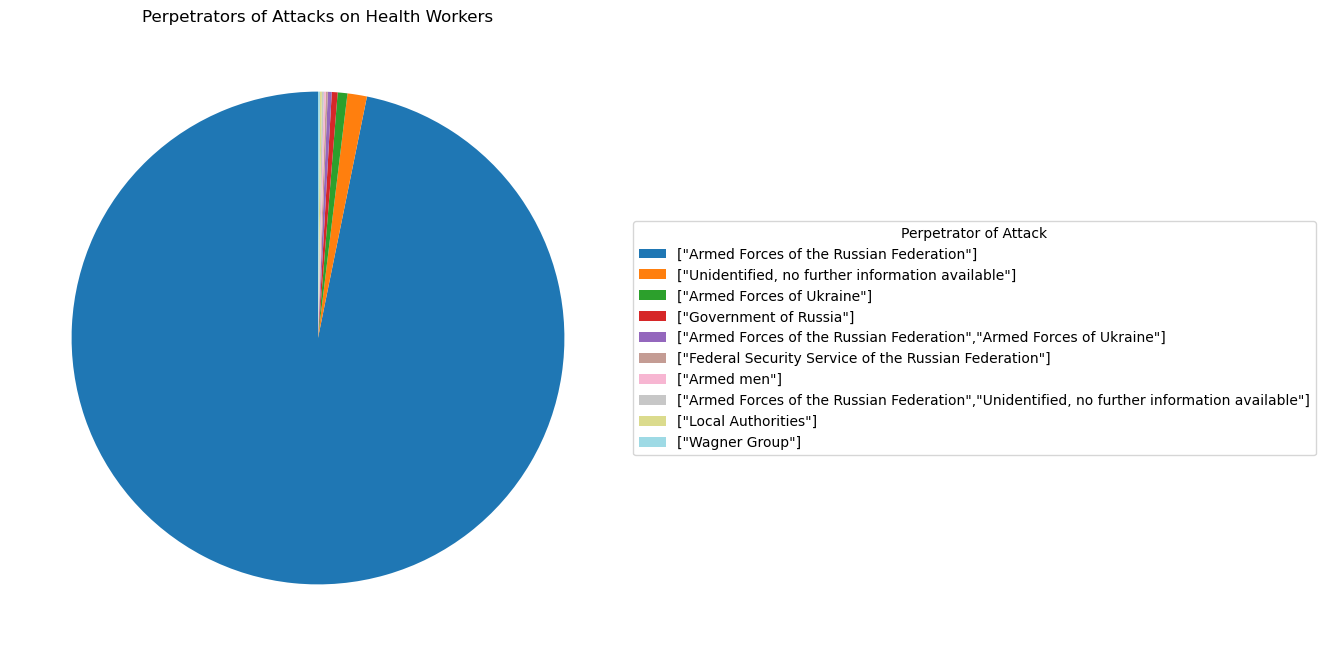

In [96]:
# Get the counts of each type of perpetrator
counts = df['Perpetrator of Attack'].value_counts()

# Define color map 
colors = plt.cm.tab20(np.linspace(0, 1, len(counts.index)))

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(counts.values, colors=colors, startangle=90)

# title
ax.set_title("Perpetrators of Attacks on Health Workers")

# legend
ax.legend(wedges, counts.index, title="Perpetrator of Attack", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()



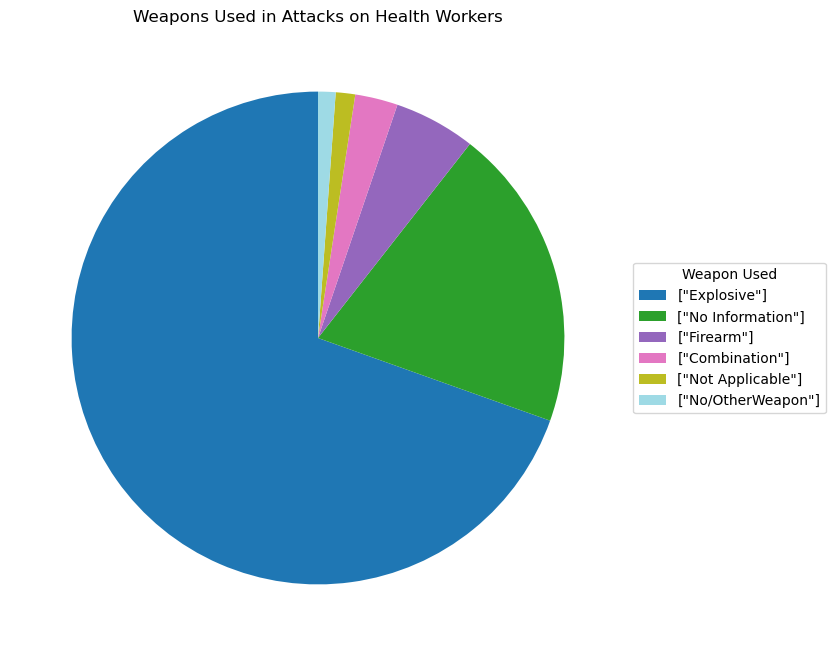

In [97]:
# Get the counts of each type of weapon used
counts = df['Weapon Used'].value_counts()

# Define color map 
colors = plt.cm.tab20(np.linspace(0, 1, len(counts.index)))

# Create the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, _ = ax.pie(counts.values, colors=colors, startangle=90, labeldistance=1.1)

# title
ax.set_title("Weapons Used in Attacks on Health Workers")

# legend
ax.legend(wedges, counts.index, title="Weapon Used", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Show the chart
plt.show()


In [98]:
from tabulate import tabulate

# Get the counts and percentages of each type of perpetrator
counts = df['Perpetrator of Attack'].value_counts()
percentages = counts / counts.sum() * 100

# Create a table with the counts and percentages
table = []
for i, index in enumerate(counts.index):
    table.append([index, counts[i], f'{percentages[i]:.1f}%'])

# Print the table
print(tabulate(table, headers=['Perpetrator of Attack', 'Total', 'Percentage']))


Perpetrator of Attack                                                                          Total  Percentage
-------------------------------------------------------------------------------------------  -------  ------------
["Armed Forces of the Russian Federation"]                                                       760  96.8%
["Unidentified, no further information available"]                                                10  1.3%
["Armed Forces of Ukraine"]                                                                        5  0.6%
["Government of Russia"]                                                                           3  0.4%
["Armed Forces of the Russian Federation","Armed Forces of Ukraine"]                               2  0.3%
["Federal Security Service of the Russian Federation"]                                             1  0.1%
["Armed men"]                                                                                      1  0.1%
["Armed Forces of the 

In [99]:
from tabulate import tabulate

# Get the counts and percentages of each type of weapon used
counts = df['Weapon Used'].value_counts()
percentages = counts / counts.sum() * 100

# Create a table with the counts and percentages
table = []
for i, index in enumerate(counts.index):
    table.append([index, counts[i], f'{percentages[i]:.1f}%'])

# Print the table
print(tabulate(table, headers=['Weapon Used', 'Total', 'Percentage']))


Weapon Used           Total  Percentage
------------------  -------  ------------
["Explosive"]           546  69.6%
["No Information"]      156  19.9%
["Firearm"]              42  5.4%
["Combination"]          22  2.8%
["Not Applicable"]       10  1.3%
["No/OtherWeapon"]        9  1.1%


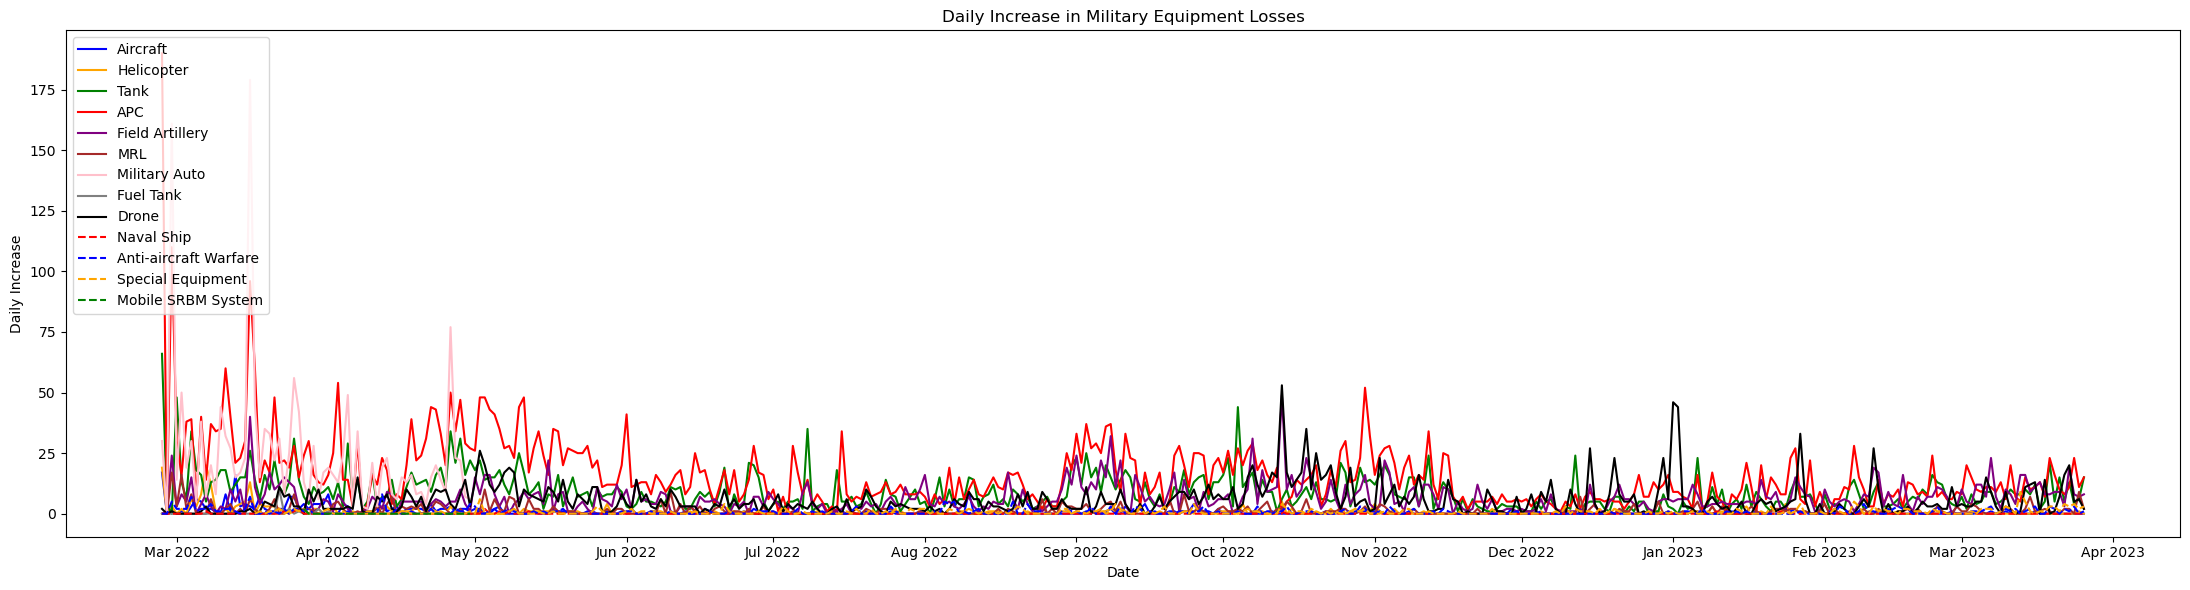

In [108]:
import matplotlib.dates as mdates

# It never reads right
df2['date'] = pd.to_datetime(df2['date'])

# Clippity doooohh daaaaaahhhh
df2['APC_daily_increase'] = df2['APC_daily_increase'].clip(lower=0)

# The longest 
fig, ax = plt.subplots(figsize=(22,6))

plt.plot(df2['date'], df2['aircraft_daily_increase'], color='blue', label='Aircraft')
plt.plot(df2['date'], df2['helicopter_daily_increase'], color='orange', label='Helicopter')
plt.plot(df2['date'], df2['tank_daily_increase'], color='green', label='Tank')
plt.plot(df2['date'], df2['APC_daily_increase'], color='red', label='APC')
plt.plot(df2['date'], df2['field artillery_daily_increase'], color='purple', label='Field Artillery')
plt.plot(df2['date'], df2['MRL_daily_increase'], color='brown', label='MRL')
plt.plot(df2['date'], df2['military auto_daily_increase'], color='pink', label='Military Auto')
plt.plot(df2['date'], df2['fuel tank_daily_increase'], color='gray', label='Fuel Tank')
plt.plot(df2['date'], df2['drone_daily_increase'], color='black', label='Drone')
plt.plot(df2['date'], df2['naval ship_daily_increase'], color='red', linestyle='dashed', label='Naval Ship')
plt.plot(df2['date'], df2['anti-aircraft warfare_daily_increase'], color='blue', linestyle='dashed', label='Anti-aircraft Warfare')
plt.plot(df2['date'], df2['special equipment_daily_increase'], color='orange', linestyle='dashed', label='Special Equipment')
plt.plot(df2['date'], df2['mobile SRBM system_daily_increase'], color='green', linestyle='dashed', label='Mobile SRBM System')

plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Daily Increase')
plt.title('Daily Increase in Military Equipment Losses')

# Format x-axis labels to show only the month
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.tight_layout()
plt.show()


In [109]:
import folium

dff = df.dropna(subset=['latitude2', 'longitude2', 'ISODate'])

# Define the color scale
color_scale = ['blue', 'green', 'orange', 'red']

# Create a map and center it
m = folium.Map(location=[dff['latitude2'].median(), dff['longitude2'].median()], zoom_start=5)

# Loop 
for col in ['Health Workers Killed', 'Health Workers Kidnapped', 'Health Workers Arrested', 'Health Workers Injured', 'Health Workers Assaulted']:
    dff_filtered = dff[dff[col] > 0]
    for i, row in dff_filtered.iterrows():
        popup_text = f"{row['eventDescription']} ({col}: {row[col]})"
        folium.Marker([row['latitude2'], row['longitude2']], popup=popup_text, icon=folium.Icon(color=color_scale[int(row['ISODate'][-4:])%4])).add_to(m)

# Show the map
m


TypeError: 'Timestamp' object is not subscriptable

In [112]:
## I struck out here, but I was trying to apply a color scale 
## across time to the map plots to depict the shift eastward in combat operations

import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Read in data and drop any rows with missing latitude or longitude 
df = df.dropna(subset=['latitude2', 'longitude2'])

# Create a map and center it
m = folium.Map(location=[df['latitude2'].median(), df['longitude2'].median()], zoom_start=5)

# Define the starting and ending dates
start_date = pd.Timestamp('2022-02-01')
end_date = pd.Timestamp('2023-03-31')

# Convert Timestamp objects to numeric values
start_value = start_date.timestamp()
end_value = end_date.timestamp()

# Loop 
for col in ['Health Workers Killed', 'Health Workers Kidnapped', 'Health Workers Arrested', 'Health Workers Injured', 'Health Workers Assaulted']:
    df_filtered = df[df[col] > 0]
    for i, row in df_filtered.iterrows():
        popup_text = f"{row['eventDescription']} ({col}: {row[col]})"
        time_value = row['ISODate'].timestamp()
        color = mcolors.rgb2hex(plt.cm.RdYlBu((time_value - start_value) / (end_value - start_value)))
        folium.Marker([row['latitude2'], row['longitude2']], popup=popup_text, icon=folium.Icon(color=color)).add_to(m)

# Show the map
m



/var/folders/tq/y257w3hd2p59ywppnr10vgq40000gq/T/ipykernel_30502/3466910000.py:27: UserWarning: color argument of Icon should be one of: {'darkpurple', 'white', 'lightgreen', 'blue', 'lightblue', 'orange', 'lightred', 'darkred', 'green', 'cadetblue', 'gray', 'purple', 'pink', 'darkblue', 'lightgray', 'darkgreen', 'beige', 'red', 'black'}.
  folium.Marker([row['latitude2'], row['longitude2']], popup=popup_text, icon=folium.Icon(color=color)).add_to(m)


In [116]:
from datetime import datetime

# Read the CSV file
df_math = pd.read_csv("HCK math.csv")

# Make it read correctly by coercing date
df_math["groupid"] = pd.to_datetime(df_math["groupid"])

from scipy.stats import ttest_ind

# Selecting the relevant columns from df1 and df_math
df1_selected = df1[["date", "daily_increase"]]
df_math_selected = df_math[["groupid", "totaldeaths"]]

# Merging the selected dataframes on "groupid"
merged_df = pd.merge(df1_selected, df_math_selected, left_on="date", right_on="groupid")

# Dropping rows with NaNs
merged_df = merged_df.dropna()

# Perform the T-test
result = ttest_ind(merged_df["daily_increase"], merged_df["totaldeaths"])

# Print the result
print("T-test result:")
print("t-statistic:", result.statistic)
print("p-value:", result.pvalue)



T-test result:
t-statistic: 21.902439984650314
p-value: 7.403475411434446e-77


In [117]:
import statsmodels.api as sm

# Define the variables
X = merged_df['daily_increase']
y = merged_df['totaldeaths']

# Adding a constant to the IV
X = sm.add_constant(X)

# Creating and fitting the model
model = sm.OLS(y, X)
results = model.fit()

# Printing the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:            totaldeaths   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.171
Date:                Fri, 05 May 2023   Prob (F-statistic):             0.0761
Time:                        19:02:40   Log-Likelihood:                -387.89
No. Observations:                 275   AIC:                             779.8
Df Residuals:                     273   BIC:                             787.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1567      0.100      1.

In [118]:
# Selecting the relevant columns from df1 and df
df1_selected = df1["daily_increase"]
df_selected = df[["categoryHealthFacilitiesDamagedDestroyed", "Infrastructure: Hospital", "Infrastructure: Health Transport", "Infrastructure: Other", "HealthWorkersAttack: Health Building", "HealthWorkersAttack: No Information", "HealthWorkersAttack: Everyday Activities", "HealthWorkersAttack: Outside Health Facility", "Number of Attacks on Health Facilities Reporting Destruction", "Number of Attacks on Health Facilities Reporting Damaged", "Health Workers Killed", "Health Workers Kidnapped", "Health Workers Arrested", "Health Workers Injured", "Health Workers Assaulted"]]

##### Does not work because the indexes can't line up

# Something about adding a constant might help?
df_selected = sm.add_constant(df_selected)

# Fit the multivariate regression model
model = sm.OLS(df1_selected, df_selected)
results = model.fit()

# Print the summary
print(results.summary())


ValueError: The indices for endog and exog are not aligned

In [120]:
# Define the variables
X = merged_df['totaldeaths']
y = merged_df['daily_increase']

# Adding a constant to the independent variable
X = sm.add_constant(X)

# Creating and fitting the model
model = sm.OLS(y, X)
results = model.fit()

# Print the results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         daily_increase   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.171
Date:                Fri, 05 May 2023   Prob (F-statistic):             0.0761
Time:                        19:33:42   Log-Likelihood:                -1969.9
No. Observations:                 275   AIC:                             3944.
Df Residuals:                     273   BIC:                             3951.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         405.9708     19.733     20.573      